# ORCA 4500 : Foundations of Data Science (Homework - 3)

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import poisson
sns.set()

Problem 2

<AxesSubplot:xlabel='values', ylabel='Count'>

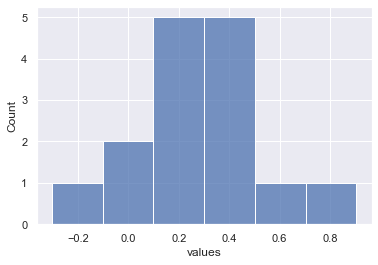

In [2]:
df = pd.read_csv('normal_samples.csv')
normal_dist_values = df['values']
sns.histplot(normal_dist_values)

In [3]:
def CI_normal_dist(dist,alpha):
    n = len(normal_dist_values)
    mle_mue = np.mean(dist)
    mle_sigma = np.std(dist)
    t_alpha_2 = stats.t.ppf(1-alpha/2,n-1)
    lower_bound = np.mean(dist) - t_alpha_2*(np.std(dist,ddof=1))/np.sqrt(n)
    upper_bound = np.mean(dist) + t_alpha_2*(np.std(dist,ddof=1))/np.sqrt(n)
    return (lower_bound,upper_bound)

print("The t interval is : ",CI_normal_dist(normal_dist_values,0.10))

The t interval is :  (0.18001270248244733, 0.4236571314338406)


Problem 3

<AxesSubplot:xlabel='values', ylabel='Count'>

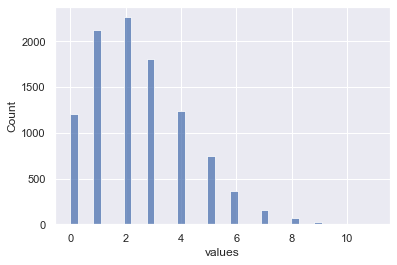

In [4]:
from scipy.optimize import minimize
df2 = pd.read_csv('accidents.csv')
dispersed_poisson_dist = df2['values']
sns.histplot(dispersed_poisson_dist)

In [5]:
def dispersed_poisson_log_likelihood(X,lam1,lam2,p):
    likelihood = p*poisson.pmf(X,lam1) + (1-p)*poisson.pmf(X,lam2)
    return (-1)*np.sum(np.log(likelihood))

def bootstrap_CI(X,m,alpha):
    n = len(X)
    X_resample = np.random.choice(X, size=(m,n))
    mles = np.zeros((m,3))
    for i in range(0, m):
        f = lambda x: dispersed_poisson_log_likelihood(X_resample[i,:],lam1=x[0],lam2=x[1],p=x[2])
        res = minimize(f, [1,2,0.5], bounds=((0, None), (0, None),(0,None)))
        mles[i,:] = res.x
    lower_bound = np.percentile(mles, alpha / 2, axis=0)
    upper_bound = np.percentile(mles, 100 - alpha / 2, axis=0)
    return (lower_bound, upper_bound, mles)

lower,upper,mle = bootstrap_CI(dispersed_poisson_dist,m=100,alpha=5)
print("Maximum Likelihood Estimates for 100 samples :\n",mle)
print("Bootstrap Confidence Interval for Lambda_1 :",(lower[0],upper[0]))
print("Bootstrap Confidence Interval for Lambda_2 :",(lower[1],upper[1]))
print("Bootstrap Confidence Interval for p :",(lower[2],upper[2]))

Maximum Likelihood Estimates for 100 samples :
 [[1.24367458 3.02233024 0.30749637]
 [1.38479098 3.1237869  0.3777975 ]
 [1.31341725 2.97195685 0.29460014]
 [1.38837923 3.11860371 0.38590629]
 [1.33392528 3.1608828  0.3672684 ]
 [1.13232205 2.98054757 0.27991744]
 [1.22991094 3.04495919 0.32438029]
 [1.32466664 3.05915907 0.3490136 ]
 [1.43427337 3.14825341 0.39455137]
 [1.34216117 3.04265699 0.3287555 ]
 [1.36481285 3.20803811 0.39427599]
 [1.46629946 3.17329882 0.41159873]
 [1.20331475 2.97004665 0.27080863]
 [1.34662158 3.1254909  0.35921321]
 [1.23136102 3.00364666 0.29698781]
 [1.11482354 2.92970347 0.24750856]
 [1.35669092 3.10015525 0.33820819]
 [1.39946216 3.17101646 0.39452217]
 [1.28583983 3.08436947 0.33380499]
 [1.36657509 3.11665785 0.35653093]
 [1.36174094 3.06955872 0.35042352]
 [1.33319705 3.07339436 0.33271411]
 [1.3160732  3.02221392 0.31826594]
 [1.40680339 3.19084629 0.3900391 ]
 [1.24609255 3.01926219 0.31060874]
 [1.36859651 3.06548008 0.34697765]
 [1.37943787 3.1